In [37]:
#Assignment 1 Question 3 - Lakeshore Data 

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
from scipy.interpolate import interp1d


In [42]:
#upload data 

os.chdir('/Users/margaretbruna/Documents/')
temp, volt, der = np.transpose(np.loadtxt('lakeshore.csv',delimiter=','))

In [43]:
#sorting the data so that voltage is in increasing order 
temp = temp[::-1]
volt = volt[::-1]
der = der[::-1]


f = interp1d(volt, temp, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')

x = np.linspace(volt[0],volt[-1],2001)
interpol_temp = []
for i in x:
    interpol_temp.append(f(i))

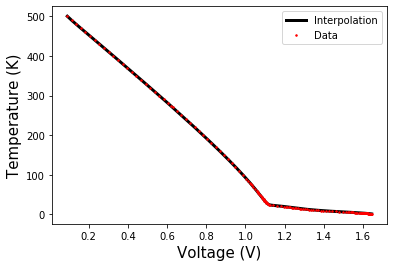

In [44]:
#plotting to check if we're close 
plt.plot(x,interpol_temp,'k-',linewidth=3,label='Interpolation')
plt.plot(volt,temp,'r.',markersize=3,label='Data')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Temperature (K)',fontsize=15)
plt.legend()

In [55]:
# I think I will take derivatives as my error estimates, and will recycle my answer from 1 a) 

def error_func(V):
    #recycled answer from Question 1 
    def approx_deriv(func,x,dx):
        f1 = (8*(func(x+dx)-func(x-dx))-(func(x+2.0*dx)-func(x-2.0*dx)))/(12*dx)
        return f1 
    
    deriv = []
    
    #Calculating the derivative for the values from my interpolation function 
    for i in volt:    
        fp = approx_deriv(f,i,1e-10)
        deriv.append(fp)
    
    #Finding the closest voltage value to the input 
    closest_V = np.abs(volt-V) 
    close = min(closest_V)
    index = 0
    #cycles through values of volt - V to see which is the smallest, and takes the index of that to take the closest voltage value from our initial array and its index
    for i in range(len(closest_V)):
        if closest_V[i]==close:
            close_V = volt[i]
            index = i 
    
    #the derivatives of our interpolation 
    deriv = np.array(deriv)
    #the error, which takes the difference between the derivative of our interpolatied value and the derivative from the data
    #at the correct index
    #and then multiplies by the difference from our closest V value to the inputted V value 
    error_dx = np.abs(deriv-der)[index]*np.absolute(close_V-V)
    return error_dx


In [56]:
#a function that will output a temperature corresponding to the voltage inputted with error! 
def interpol(v_want):
    print(f'for a voltage {np.round(v_want,3)} V the temperature is {np.round(f(v_want),3)} K with an error of {np.round(error_func(v_want),3)} K')
    
    

In [59]:
interpol(1.4)

for a voltage 1.4 V the temperature is 9.412 K with an error of 0.017 K
